In [1]:
import numpy as np
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.manifold import Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import random

In [2]:
mnist_images = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist_images.data[:60_000], mnist_images.target[:60_000]
X_test, y_test = mnist_images.data[60_000:], mnist_images.target[60_000:]
model = RandomForestClassifier(random_state=60)

In [3]:
n_samples = 10_000
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]


In [4]:
def plot_reduced_data(X_reduced, y, title, use_labels=False):
    plt.figure(figsize=(10, 8))
    if X_reduced.shape[0] > 1000:
        idx = np.random.choice(X_reduced.shape[0], size=1000, replace=False)
        X_reduced = X_reduced[idx]
        y = y[idx]
    if use_labels:
        for i, (x, label) in enumerate(zip(X_reduced, y)):
            plt.text(x[0], x[1], str(label), color=plt.cm.tab10(int(label)), fontdict={'size': 8})
    else:
        scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.astype(int), cmap="tab10", s=10, alpha=0.7)
        plt.colorbar(scatter, ticks=range(10))
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()



In [ ]:
tsne = TSNE(n_components=2, random_state=60)
X_train_tsne = tsne.fit_transform(X_subset)

plot_reduced_data(X_train_tsne, y_subset, "t-SNE Reduction - Training Set", use_labels=False)


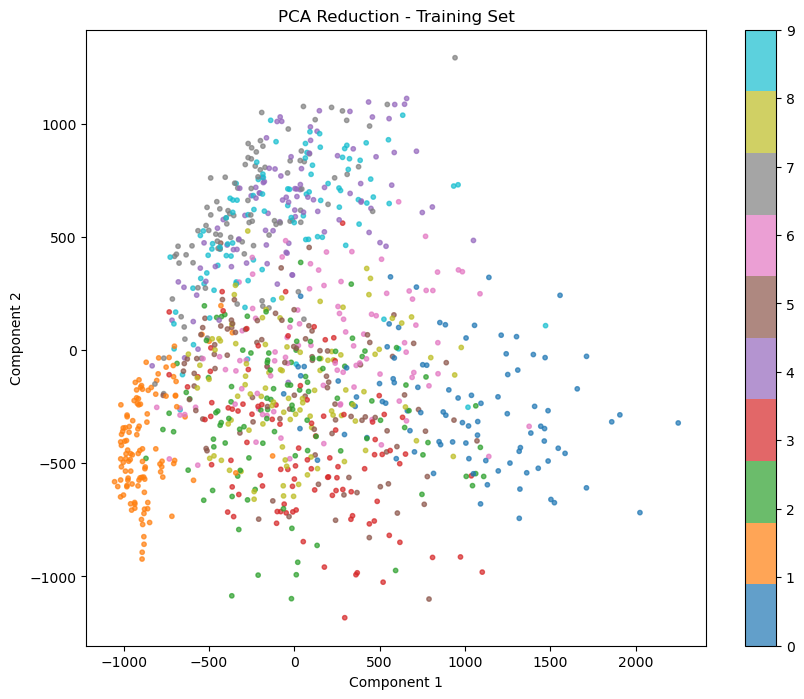

PCA - RandomForest Performance
Accuracy: 0.4237
Precision: 0.4049264275267376
Recall: 0.4144117089789795
F1 Score: 0.40811712993981447


In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_subset)
X_test_pca = pca.transform(X_test)

plot_reduced_data(X_train_pca, y_subset, "PCA Reduction - Training Set", use_labels=False)

clf = model
clf.fit(X_train_pca, y_subset)
y_pred_pca = clf.predict(X_test_pca)

print("PCA - RandomForest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Precision:", precision_score(y_test, y_pred_pca, average="macro"))
print("Recall:", recall_score(y_test, y_pred_pca, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred_pca, average="macro"))


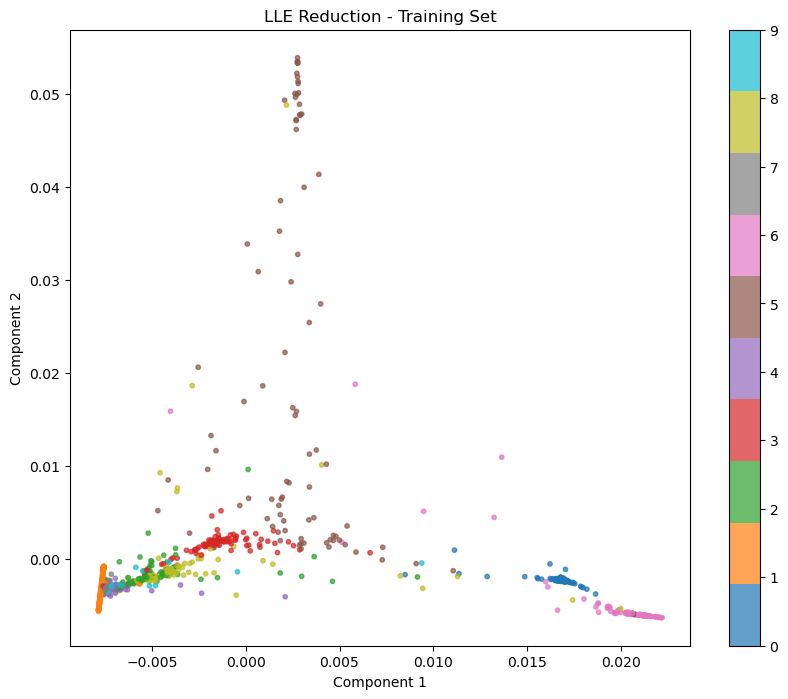

LLE - RandomForest Performance
Accuracy: 0.8181
Precision: 0.8165885109656357
Recall: 0.8172441971799691
F1 Score: 0.8166657429735803


In [7]:
lle = LocallyLinearEmbedding(n_components=2, random_state=60)
X_train_lle = lle.fit_transform(X_subset)
X_test_lle = lle.transform(X_test)

plot_reduced_data(X_train_lle, y_subset, "LLE Reduction - Training Set", use_labels=False)

clf = model
clf.fit(X_train_lle, y_subset)
y_pred_lle = clf.predict(X_test_lle)

print("LLE - RandomForest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lle))
print("Precision:", precision_score(y_test, y_pred_lle, average="macro"))
print("Recall:", recall_score(y_test, y_pred_lle, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred_lle, average="macro"))


In [ ]:
mds = MDS(n_components=2, random_state=60)

X_mds = mds.fit_transform(X_subset)


clf = RandomForestClassifier(random_state=60)


scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro"),
    "f1": make_scorer(f1_score, average="macro"),
}


scores = cross_val_score(clf, X_mds, y, cv=5, scoring=scoring)


print("Cross-Validation Performance with MDS + Random Forest:")
for metric, score in scores.items():
    print(f"{metric.capitalize()}: {score.mean():.4f} ± {score.std():.4f}")


In [ ]:
isomap = Isomap(n_neighbors=10, n_components=2)
X_train_isomap = isomap.fit_transform(X_subset)
X_test_isomap = isomap.transform(X_test)

plot_reduced_data(X_train_isomap, y_subset, "Isomap Reduction - Training Set", use_labels=False)

clf = model
clf.fit(X_train_isomap, y_subset)
y_pred_isomap = clf.predict(X_test_isomap)

print("Isomap - RandomForest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_isomap))
print("Precision:", precision_score(y_test, y_pred_isomap, average="macro"))
print("Recall:", recall_score(y_test, y_pred_isomap, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred_isomap, average="macro"))


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_subset, y_subset)
X_test_lda = lda.transform(X_test)

plot_reduced_data(X_train_lda, y_subset, "LDA Reduction - Training Set", use_labels=False)

clf = model
clf.fit(X_train_lda, y_subset)
y_pred_lda = clf.predict(X_test_lda)

print("LDA - RandomForest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Precision:", precision_score(y_test, y_pred_lda, average="macro"))
print("Recall:", recall_score(y_test, y_pred_lda, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred_lda, average="macro"))
